In [1]:
import FailtogetConv_error as fe
fe.fail_to_get_conv()

1 Physical GPUs, 1 Logical GPUs


In [2]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train_paths = glob('../dataset/cifar/train/*.png')
test_paths = glob('../dataset/cifar/test/*.png')

len(train_paths), len(test_paths)

(50000, 10000)

In [4]:
path = train_paths[0]
path

'../dataset/cifar/train/0_frog.png'

In [5]:
fname = os.path.basename(path)
cls_name = fname.replace('.png', '').split('_')[1]
cls_name

'frog'

## class 이름 얻은 것을 함수로 묶기

In [6]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png', '').split('_')[1]
    return cls_name

In [7]:
cls_name = get_class_name(path)
path, cls_name

('../dataset/cifar/train/0_frog.png', 'frog')

## class 개수 확인

In [8]:
class_names = []

for path in train_paths:
    cls_name = get_class_name(path)
    class_names.append(cls_name)

In [9]:
class_names = [get_class_name(path) for path in train_paths]

In [10]:
len(class_names)

50000

In [11]:
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [12]:
uniques = np.unique(class_names, return_counts=True)

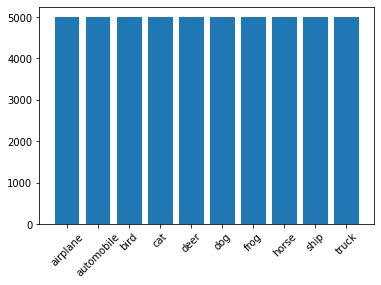

In [13]:
#plt.bar(uniques[0], uniques[1])
plt.bar(*uniques)
plt.xticks(rotation=45)
plt.show()

## Dataframe 생성

In [14]:
data_ex = {'a':[1,2,3], 'b':[10,20,30], 'c':[100,200,300]}
df_ex = pd.DataFrame(data_ex)
df_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [15]:
train_paths[0], class_names[0]

('../dataset/cifar/train/0_frog.png', 'frog')

In [16]:
data = {'name':train_paths, 'class':class_names}
train_df = pd.DataFrame(data)
train_df.head()

,name,class
0,../dataset/cifar/train/0_frog.png,frog
1,../dataset/cifar/train/10000_automobile.png,automobile
2,../dataset/cifar/train/10001_frog.png,frog
3,../dataset/cifar/train/10002_frog.png,frog
4,../dataset/cifar/train/10003_ship.png,ship


In [17]:
test_names = [get_class_name(path) for path in test_paths]

In [18]:
test_data = {'name':test_paths, 'class':test_names}
test_df = pd.DataFrame(test_data)
test_df.head()

,name,class
0,../dataset/cifar/test/0_cat.png,cat
1,../dataset/cifar/test/1000_dog.png,dog
2,../dataset/cifar/test/1001_airplane.png,airplane
3,../dataset/cifar/test/1002_ship.png,ship
4,../dataset/cifar/test/1003_deer.png,deer


## Dataframe 저장

In [19]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

## Data 확인

In [20]:
from PIL import Image
from tqdm import tqdm

In [21]:
heights = []
widths = []

for path in tqdm(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    
    heights.append(h)
    widths.append(w)

100%|██████████| 50000/50000 [00:48<00:00, 1020.60it/s]


In [22]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))

## Hyperparamter Tunning

In [23]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.7

input_shape = (28, 28, 1)
num_classes = 10

## preprocess

In [24]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [25]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [26]:
train_df.head()

,name,class
0,../dataset/cifar/train/0_frog.png,frog
1,../dataset/cifar/train/10000_automobile.png,automobile
2,../dataset/cifar/train/10001_frog.png,frog
3,../dataset/cifar/train/10002_frog.png,frog
4,../dataset/cifar/train/10003_ship.png,ship


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [28]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col = 'name',
    y_col = 'class',
    target_size = input_shape[:2],
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 50000 validated image filenames belonging to 10 classes.


In [29]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'name',
    y_col = 'class',
    target_size = input_shape[:2],
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 10000 validated image filenames belonging to 10 classes.


## Model

In [30]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [32]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 2.0846 - accuracy: 0.2249 - val_loss: 1.8238 - val_accuracy: 0.3456
Epoch 2/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8915 - accuracy: 0.3113 - val_loss: 1.7766 - val_accuracy: 0.3576
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.8188 - accuracy: 0.3394 - val_loss: 1.7759 - val_accuracy: 0.3362
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.7757 - accuracy: 0.3580 - val_loss: 1.8185 - val_accuracy: 0.3411
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.7463 - accuracy: 0.3704 - val_loss: 1.9312 - val_accuracy: 0.3141
Epoch 6/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.7211 - accuracy: 0.3780 - val_loss: 1.7813 - val_accuracy: 0.3580
Epoch 7/10
1563/1563 [=====================